# ** Milestone 1: Data Preparation & Initial Analysis **




In [ ]:
# -------------------------------
# 1. Setup Project Environment
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except NameError:
    pass

In [ ]:
# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv("GlobalWeatherRepository.csv")

# Quick peek at the original data
print("Original Dataset Shape:", df.shape)
print("Original Dataset Columns:")
print(df.columns)
print(df.head())


Original Dataset Shape: (88273, 41)
Original Dataset Columns:
Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      

In [ ]:

# -------------------------------
# 3. Create a Copy for Normalization and Inspection
# -------------------------------
df_normalized = df.copy()



In [ ]:
# -------------------------------
# 4. Inspect Dataset Structure
# -------------------------------
print("\n--- Inspecting the Normalized Dataset ---")
print(df_normalized.info())
print("\nSummary statistics:")
print(df_normalized.describe(include="all"))


--- Inspecting the Normalized Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88273 entries, 0 to 88272
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       88273 non-null  object 
 1   location_name                 88273 non-null  object 
 2   latitude                      88273 non-null  float64
 3   longitude                     88273 non-null  float64
 4   timezone                      88273 non-null  object 
 5   last_updated_epoch            88273 non-null  int64  
 6   last_updated                  88273 non-null  object 
 7   temperature_celsius           88273 non-null  float64
 8   temperature_fahrenheit        88273 non-null  float64
 9   condition_text                88273 non-null  object 
 10  wind_mph                      88273 non-null  float64
 11  wind_kph                      88273 non-null  float64
 12  wind_degree      

In [ ]:
# -------------------------------
# 5. Missing Values & Coverage
# -------------------------------
print("\nMissing values per column:\n", df_normalized.isnull().sum())
print("\nData coverage (non-null counts):\n", df_normalized.count())



Missing values per column:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone  

In [ ]:
# -------------------------------
# 6. Data Cleaning & Preprocessing
# -------------------------------
# Drop duplicate rows
df_normalized = df_normalized.drop_duplicates()

# Convert the date column to datetime and set it as the index
date_col = 'last_updated'
df_normalized[date_col] = pd.to_datetime(df_normalized[date_col], errors='coerce')
df_normalized.set_index(date_col, inplace=True)

# Handle missing values using forward-fill and back-fill imputation
df_normalized = df_normalized.ffill().bfill()

# Drop redundant unit columns to keep only one standard unit for each measurement
redundant_cols_to_drop = [
    'temperature_fahrenheit',
    'wind_mph',
    'pressure_in',
    'precip_in',
    'visibility_miles',
    'feels_like_fahrenheit',
    'gust_mph'
]
df_normalized = df_normalized.drop(columns=redundant_cols_to_drop, errors='ignore')

In [ ]:
# -------------------------------
# 7. Aggregate Data (Daily -> Monthly Averages) using groupby
# -------------------------------
# Extract month and year from the datetime index
df_normalized['month'] = df_normalized.index.month
df_normalized['year'] = df_normalized.index.year

# Group by year and month to get monthly averages
monthly_avg_df = df_normalized.groupby(['year', 'month']).mean(numeric_only=True)

print("\nMonthly averages (first 5 rows):")
print(monthly_avg_df.head())



Monthly averages (first 5 rows):
             latitude  longitude  last_updated_epoch  temperature_celsius  \
year month                                                                  
2024 5      19.330079  21.252653        1.716476e+09            25.153214   
     6      19.169585  21.786945        1.718494e+09            26.456036   
     7      19.090607  22.195843        1.721096e+09            26.800448   
     8      19.107315  22.088584        1.723808e+09            26.789677   
     9      19.064397  22.147510        1.726441e+09            25.124402   

             wind_kph  wind_degree  pressure_mb  precip_mm   humidity  \
year month                                                              
2024 5      14.322680   170.234384  1013.072468   0.160403  59.805033   
     6      14.694197   178.421044  1011.961081   0.156849  58.788014   
     7      13.979538   183.502419  1011.521233   0.163338  59.406200   
     8      13.915649   180.594045  1011.993052   0.166756  5

### **Milestone 1 complete**

### **Milestone 2: Core Analysis & Visualization Design**

In [ ]:
# -------------------------------
# 8. Data Analysis (on the aggregated data)
# -------------------------------
# Calculate the correlation matrix
print("\nCorrelation Matrix:")
print(monthly_avg_df.corr())

# Analyze seasonal trends
seasonal_avg_df = monthly_avg_df.groupby('month').mean(numeric_only=True)
print("\nSeasonal average patterns:")
print(seasonal_avg_df)

# Identify extreme weather events
extreme_temp = monthly_avg_df.nlargest(5, 'temperature_celsius')
print("\nTop 5 hottest months:\n", extreme_temp[['temperature_celsius']])


Correlation Matrix:
                              latitude  longitude  last_updated_epoch  \
latitude                      1.000000  -0.474705           -0.462758   
longitude                    -0.474705   1.000000            0.298196   
last_updated_epoch           -0.462758   0.298196            1.000000   
temperature_celsius          -0.030805  -0.447756           -0.225648   
wind_kph                      0.265875  -0.723731           -0.411070   
wind_degree                  -0.157679  -0.278852           -0.096040   
pressure_mb                   0.031078   0.399148            0.328760   
precip_mm                     0.075171  -0.325127           -0.400775   
humidity                     -0.192792   0.672707            0.529500   
cloud                        -0.111411   0.550430           -0.144930   
feels_like_celsius           -0.002221  -0.463827           -0.233244   
visibility_km                 0.049192  -0.509542           -0.171977   
uv_index                      

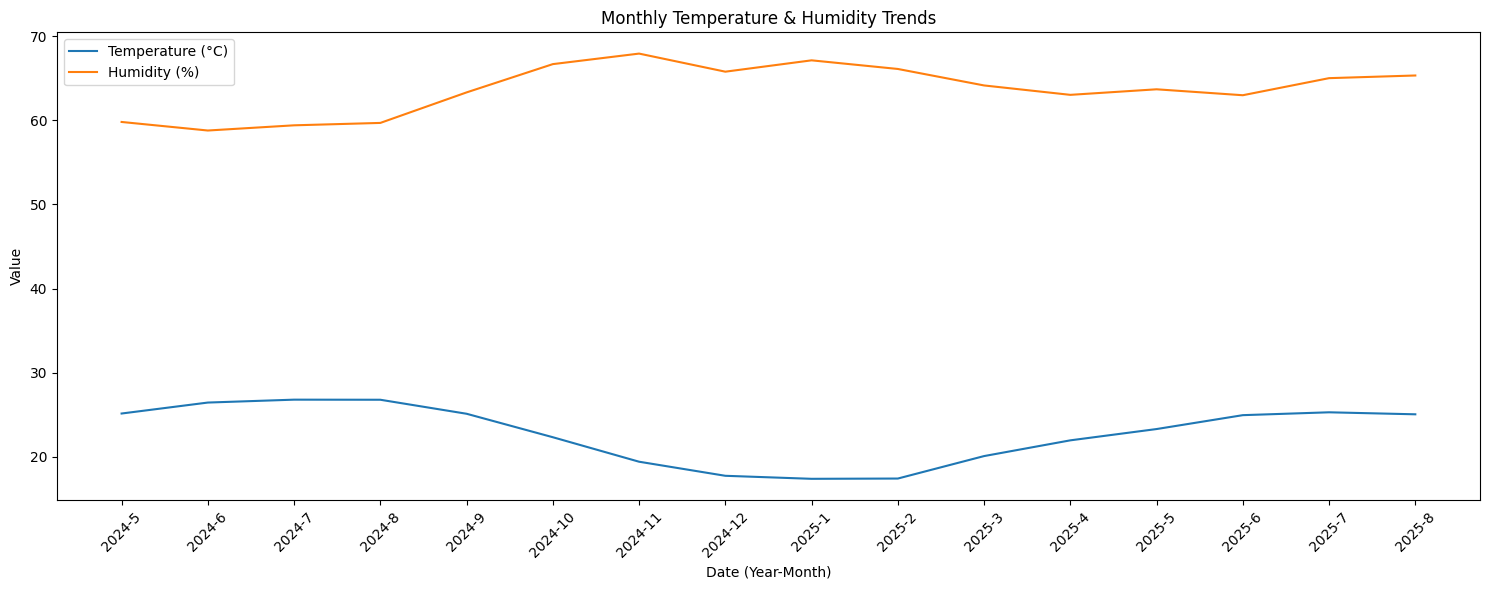

In [ ]:
# -------------------------------
# 9. Visualization (Static)
# -------------------------------

# Plot monthly trends for temperature and humidity
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['temperature_celsius'], label="Temperature (°C)")
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['humidity'], label="Humidity (%)")
plt.title("Monthly Temperature & Humidity Trends")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-2970453577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="country", x="temperature_celsius", data=avg_temp_by_country, palette="coolwarm")


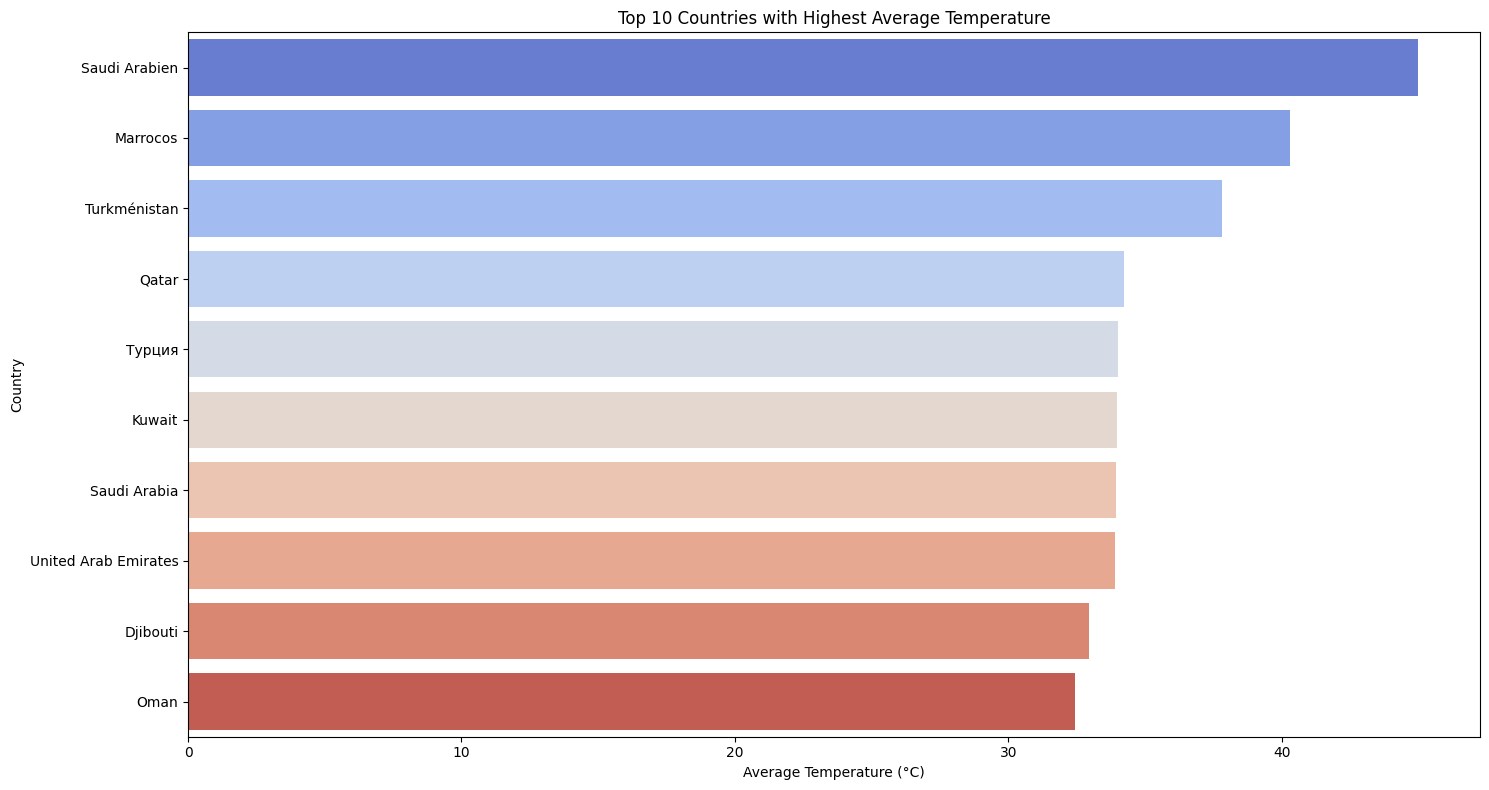

In [ ]:
# Plot top 10 countries with the highest average temperature
# Note: This plot uses the original `df` to access the `temperature_celsius` column.
avg_temp_by_country = df.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(y="country", x="temperature_celsius", data=avg_temp_by_country, palette="coolwarm")
plt.ylabel("Country")
plt.xlabel("Average Temperature (°C)")
plt.title("Top 10 Countries with Highest Average Temperature")
plt.tight_layout()
plt.show()

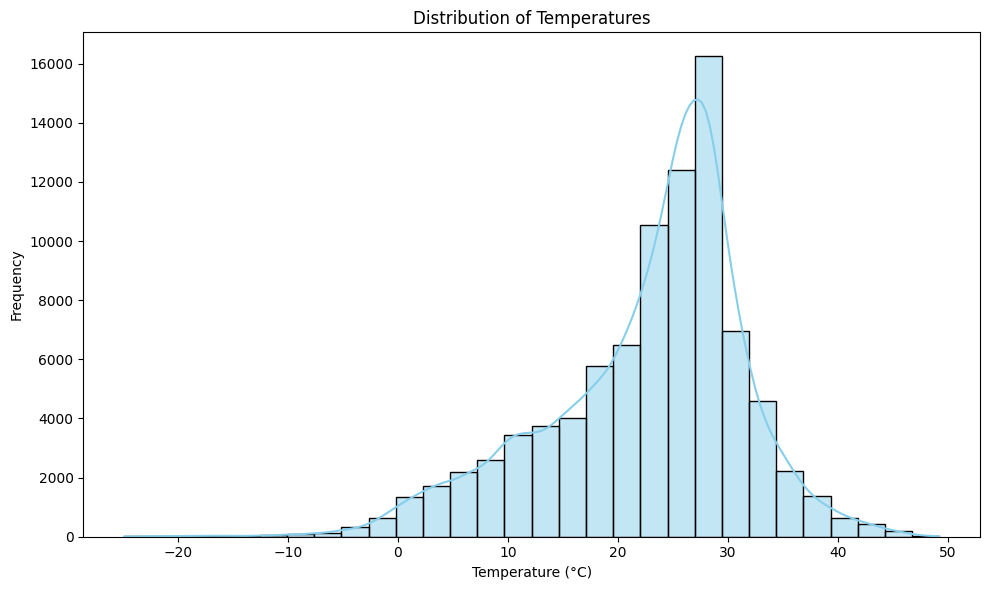

In [ ]:
# Plot distribution of temperatures
plt.figure(figsize=(10, 6))
sns.histplot(df["temperature_celsius"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperatures")
plt.tight_layout()
plt.show()

/tmp/ipython-input-696709920.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


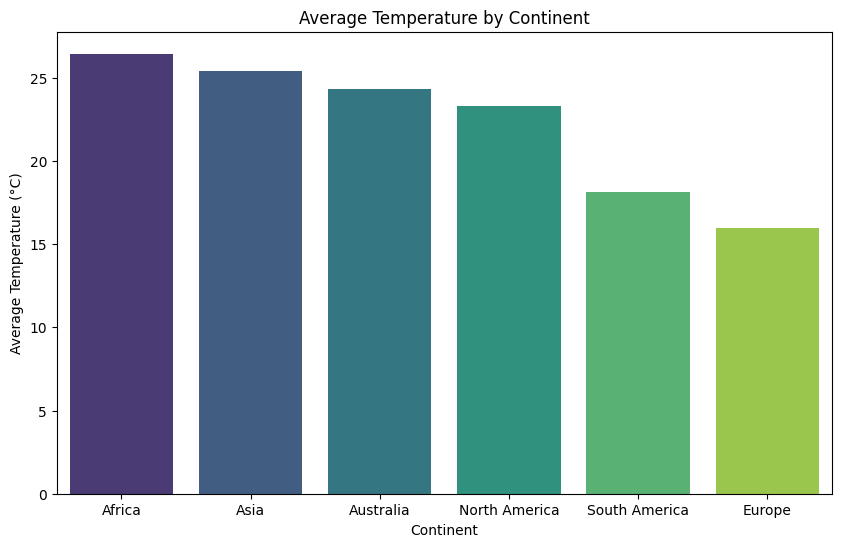

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('GlobalWeatherRepository.csv')

# Mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Australia',
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa',
    'Cabo Verde': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Fiji': 'Australia', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe',
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Australia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa',
    'Malta': 'Europe', 'Marshall Islands': 'Australia', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Mexico': 'North America', 'Micronesia': 'Australia', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Mongolia': 'Asia',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar (Burma)': 'Asia',
    'Namibia': 'Africa', 'Nauru': 'Australia', 'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Australia',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa', 'North Korea': 'Asia', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palau': 'Australia', 'Palestine': 'Asia',
    'Panama': 'North America', 'Papua New Guinea': 'Australia', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Australia', 'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Australia', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia',
    'South Sudan': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia',
    'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia', 'Vatican City': 'Europe', 'Venezuela': 'South America', 'Vietnam': 'Asia',
    'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Create a new 'continent' column based on the 'country' column
df['continent'] = df['country'].map(country_to_continent)

# Remove rows where the continent could not be determined
df.dropna(subset=['continent'], inplace=True)

# Calculate the average temperature for each continent
continent_avg_temp = df.groupby('continent')['temperature_celsius'].mean().reset_index()

# Sort the data by average temperature in descending order
continent_avg_temp = continent_avg_temp.sort_values(by='temperature_celsius', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=continent_avg_temp,
    x='continent',
    y='temperature_celsius',
    palette='viridis'
)

plt.xlabel("Continent")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature by Continent")

# Save the plot to a file
plt.savefig('average_temperature_by_continent.png', bbox_inches='tight')

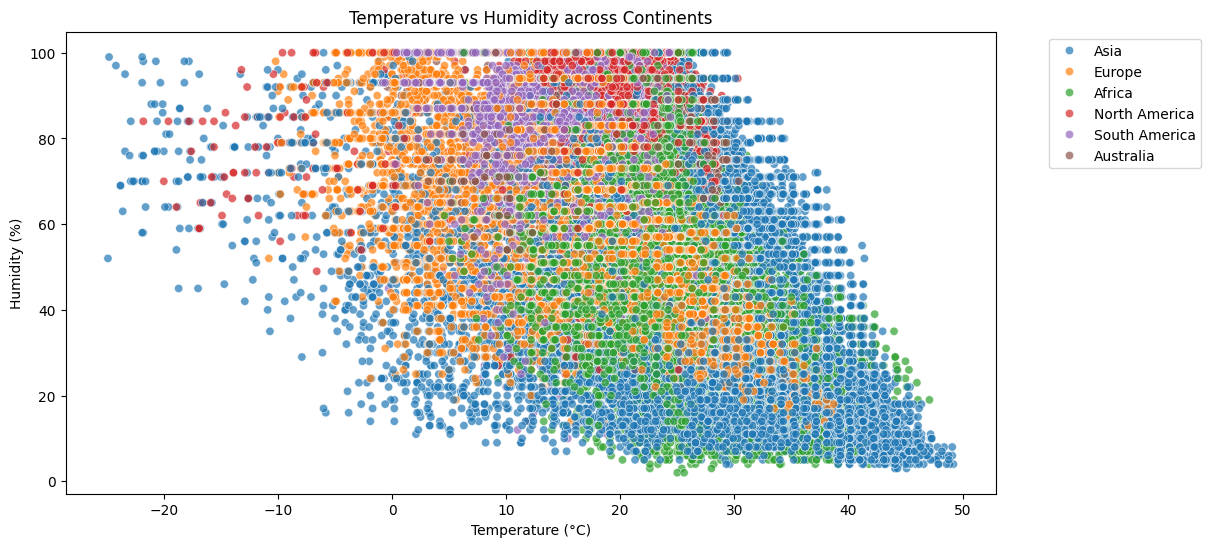

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('GlobalWeatherRepository.csv')

# Mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Australia',
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa',
    'Cabo Verde': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Fiji': 'Australia', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe',
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Australia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa',
    'Malta': 'Europe', 'Marshall Islands': 'Australia', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Mexico': 'North America', 'Micronesia': 'Australia', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Mongolia': 'Asia',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar (Burma)': 'Asia',
    'Namibia': 'Africa', 'Nauru': 'Australia', 'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Australia',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa', 'North Korea': 'Asia', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palau': 'Australia', 'Palestine': 'Asia',
    'Panama': 'North America', 'Papua New Guinea': 'Australia', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Australia', 'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Australia', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia',
    'South Sudan': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia',
    'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia', 'Vatican City': 'Europe', 'Venezuela': 'South America', 'Vietnam': 'Asia',
    'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Create a new 'continent' column based on the 'country' column
df['continent'] = df['country'].map(country_to_continent)

# Remove rows where the continent could not be determined
df.dropna(subset=['continent'], inplace=True)

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="temperature_celsius",
    y="humidity",
    hue="continent",
    alpha=0.7
)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs Humidity across Continents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to a file
plt.savefig('temperature_vs_humidity_by_continent.png', bbox_inches='tight')

In [ ]:
# Save the analyzed and changed DataFrame to a new CSV file
df_normalized.to_csv("Weather_Cleaned_For_Plotting.csv", index=True)

print("cleaned dataset saved successfully as 'Weather_Cleaned_For_Plotting.csv'")

cleaned dataset saved successfully as 'Weather_Cleaned_For_Plotting.csv'
